<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B1%5D_ER_cHB_DT_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.7
60,10.0,34.0,0.0,0.0,29.3,0.0,6.8,65.5
90,3.5,16.9,17.4,8.9,0.0,35.4,4.5,60.5
120,13.9,46.9,0.0,0.0,28.0,0.0,3.5,60.2


In [2]:
# TODO: Minimum price of the data
minimum_Oil_ER = np.min(Oil_ER)

# TODO: Maximum price of the data
maximum_Oil_ER = np.max(Oil_ER)

# TODO: Mean price of the data
mean_Oil_ER = np.mean(Oil_ER)

# TODO: Median price of the data
median_Oil_ER = np.median(Oil_ER)

# TODO: Standard deviation of prices of the data
std_Oil_ER = np.std(Oil_ER)

# Show the calculated statistics

print("Statistics for bio-crude ER dataset:\n")
print("Minimum bio-crude oil ER:{: .2f} %".format(minimum_Oil_ER))
print("Maximum bio-crude oil ER:{: .2f} %".format(maximum_Oil_ER))
print("Mean bio-crude oil ER:{: .2f} %".format(mean_Oil_ER))
print("Median bio-crude oil ER:{: .2f} %".format(median_Oil_ER))
print("Standard deviation of bio-crude oil ER:{: .2f} %".format(std_Oil_ER))

data.describe()

Statistics for bio-crude ER dataset:

Minimum bio-crude oil ER: 2.50 %
Maximum bio-crude oil ER: 92.00 %
Mean bio-crude oil ER: 43.97 %
Median bio-crude oil ER: 45.20 %
Standard deviation of bio-crude oil ER: 19.91 %


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.077692,25.000000,18.858462,8.073846,19.490000,8.094615,6.849231,43.970769
std,19.042308,26.912396,27.227704,16.668829,26.616579,14.239008,11.152323,19.988467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000
50%,1.700000,18.350000,0.000000,0.000000,9.900000,0.000000,2.450000,45.200000
75%,12.175000,44.550000,37.325000,7.975000,27.600000,13.975000,7.150000,58.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,92.000000


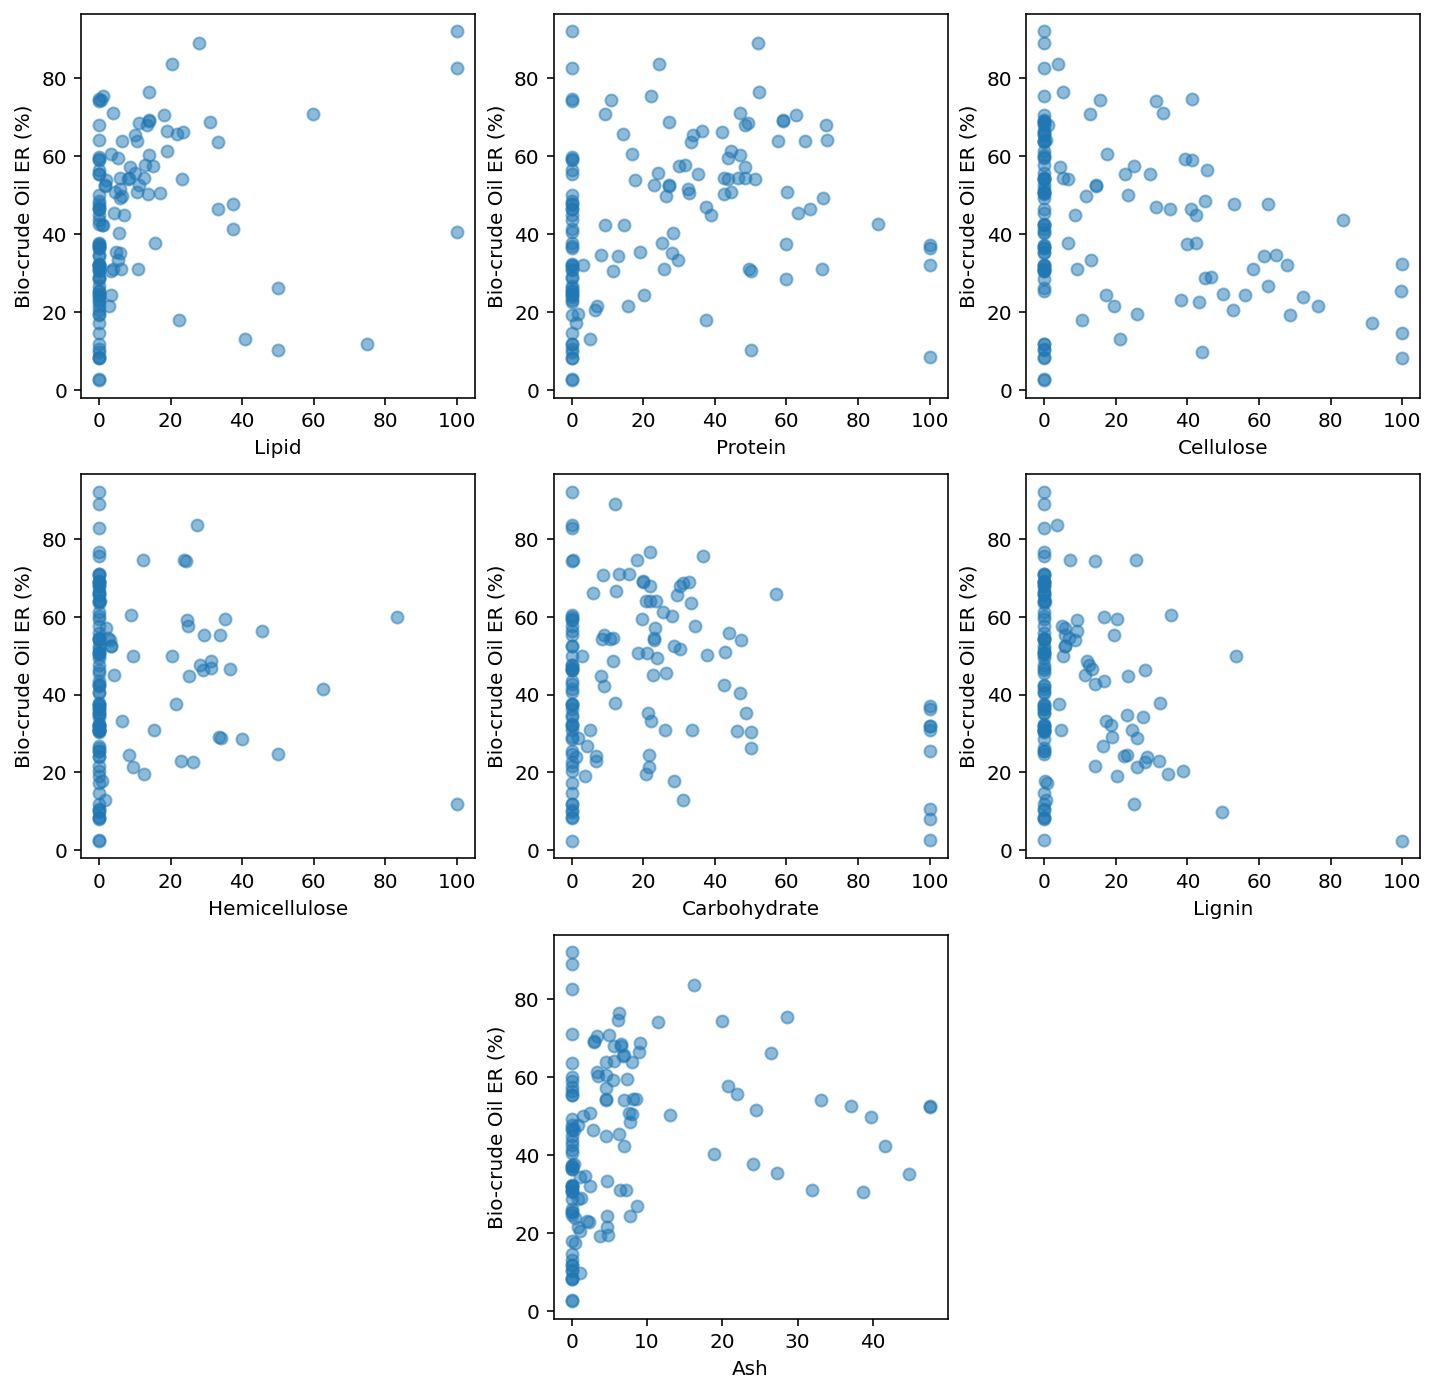

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Protein'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Ash'],data['Bio-crude Oil ER'],alpha = 0.5)
plt.show()

(array([2., 0., 0., 3., 3., 3., 1., 0., 2., 2., 3., 3., 5., 2., 3., 7., 5.,
        3., 4., 5., 0., 3., 4., 3., 4., 3., 6., 5., 6., 3., 4., 3., 4., 0.,
        4., 4., 3., 3., 3., 0., 4., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 2.5 ,  4.29,  6.08,  7.87,  9.66, 11.45, 13.24, 15.03, 16.82,
        18.61, 20.4 , 22.19, 23.98, 25.77, 27.56, 29.35, 31.14, 32.93,
        34.72, 36.51, 38.3 , 40.09, 41.88, 43.67, 45.46, 47.25, 49.04,
        50.83, 52.62, 54.41, 56.2 , 57.99, 59.78, 61.57, 63.36, 65.15,
        66.94, 68.73, 70.52, 72.31, 74.1 , 75.89, 77.68, 79.47, 81.26,
        83.05, 84.84, 86.63, 88.42, 90.21, 92.  ]),
 <a list of 50 Patch objects>)

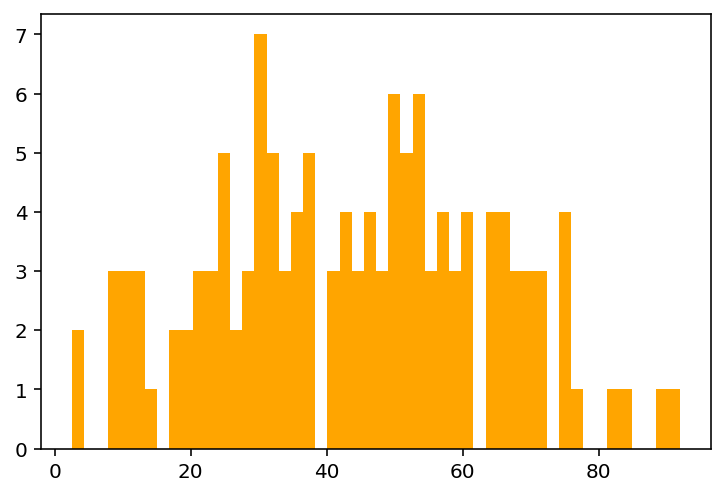

In [4]:
plt.hist(data['Bio-crude Oil ER'],bins=50,color='orange')

(array([66.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

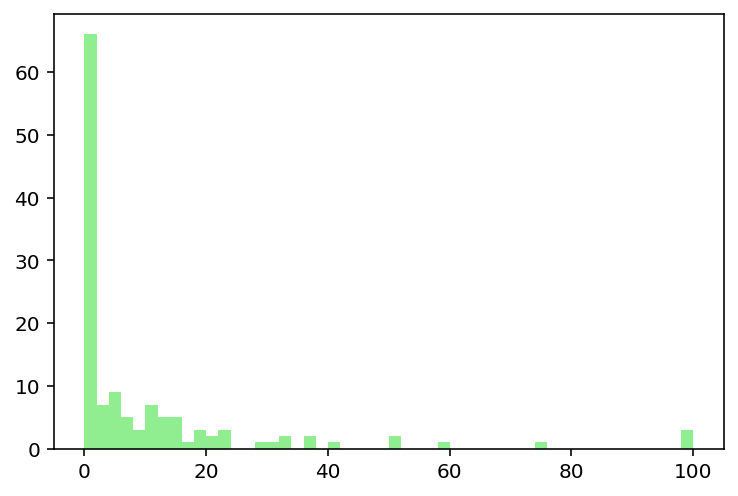

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


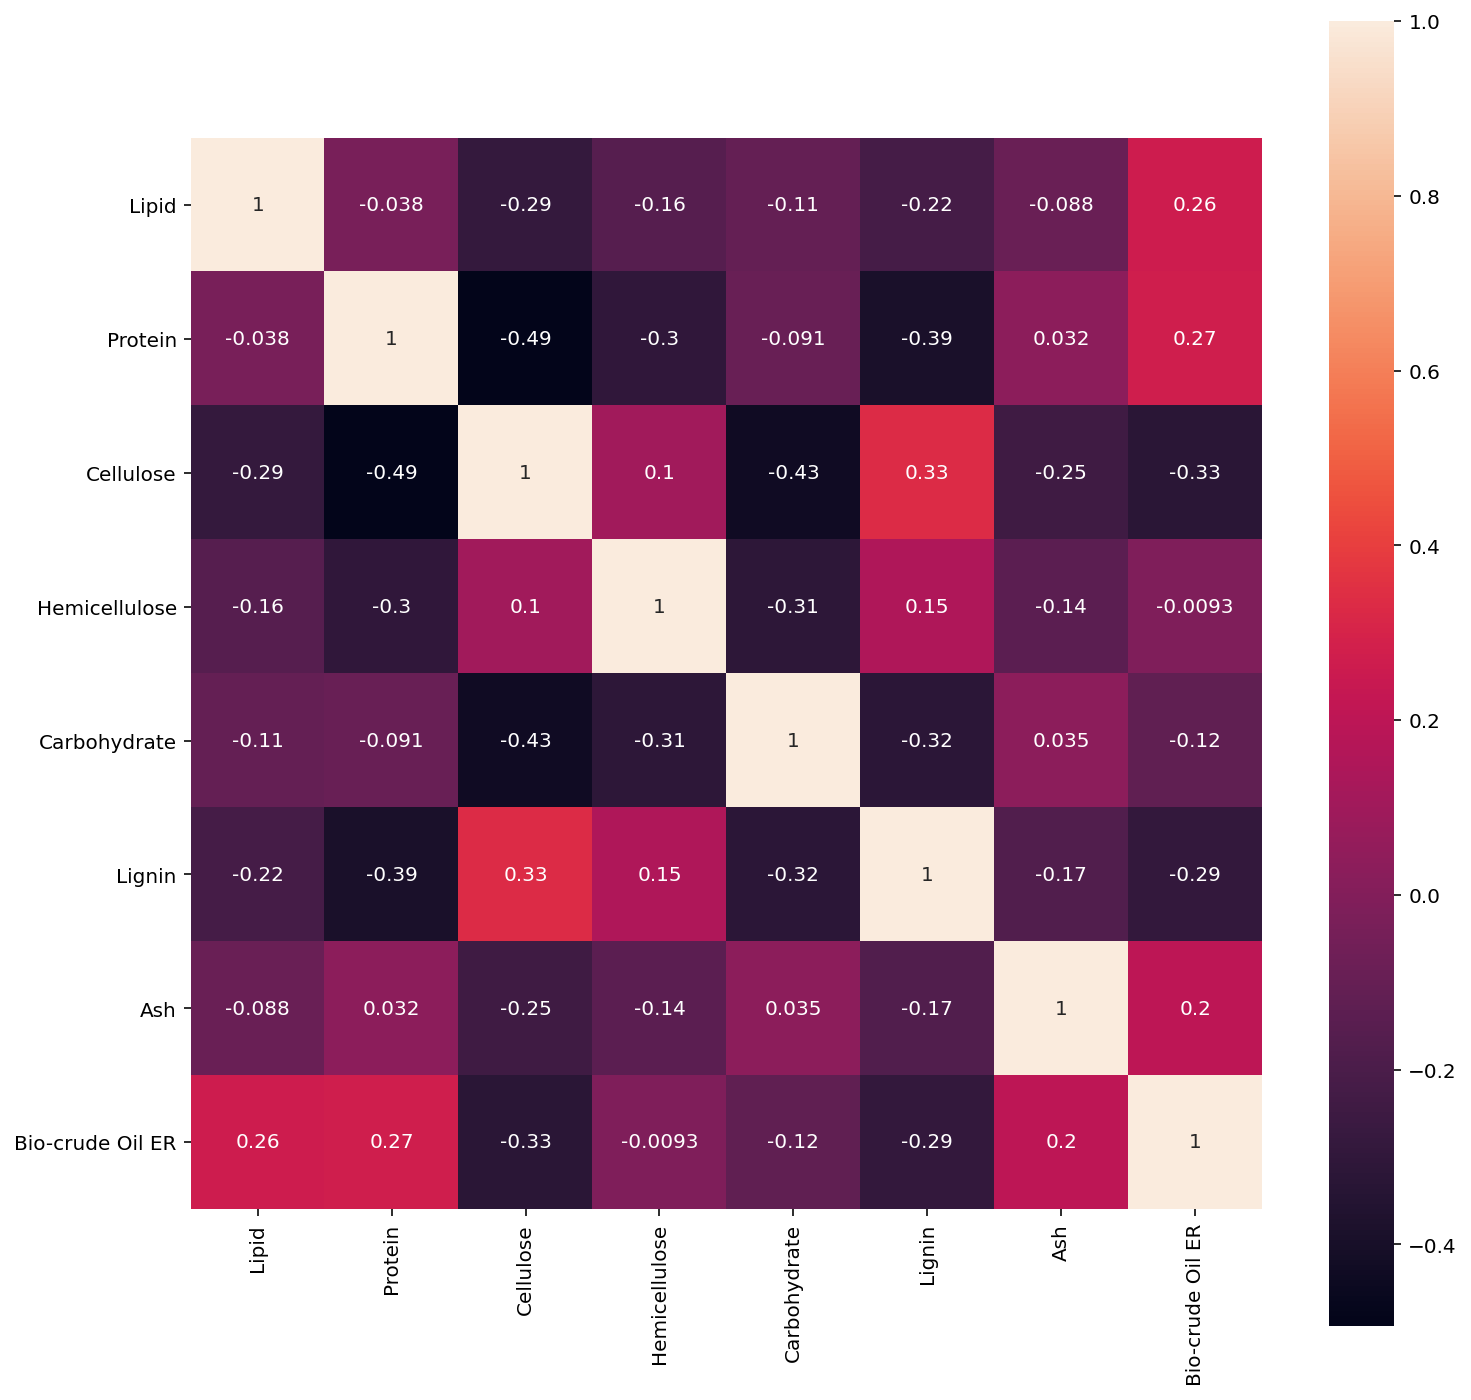

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [ ]:
# No use now.
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

print (Features.shape)
print (X_train.shape)
print (X_test.shape)

# Success
print ("Training and testing split was successful.")

(123, 7)
(82, 7)
(41, 7)
Training and testing split was successful.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

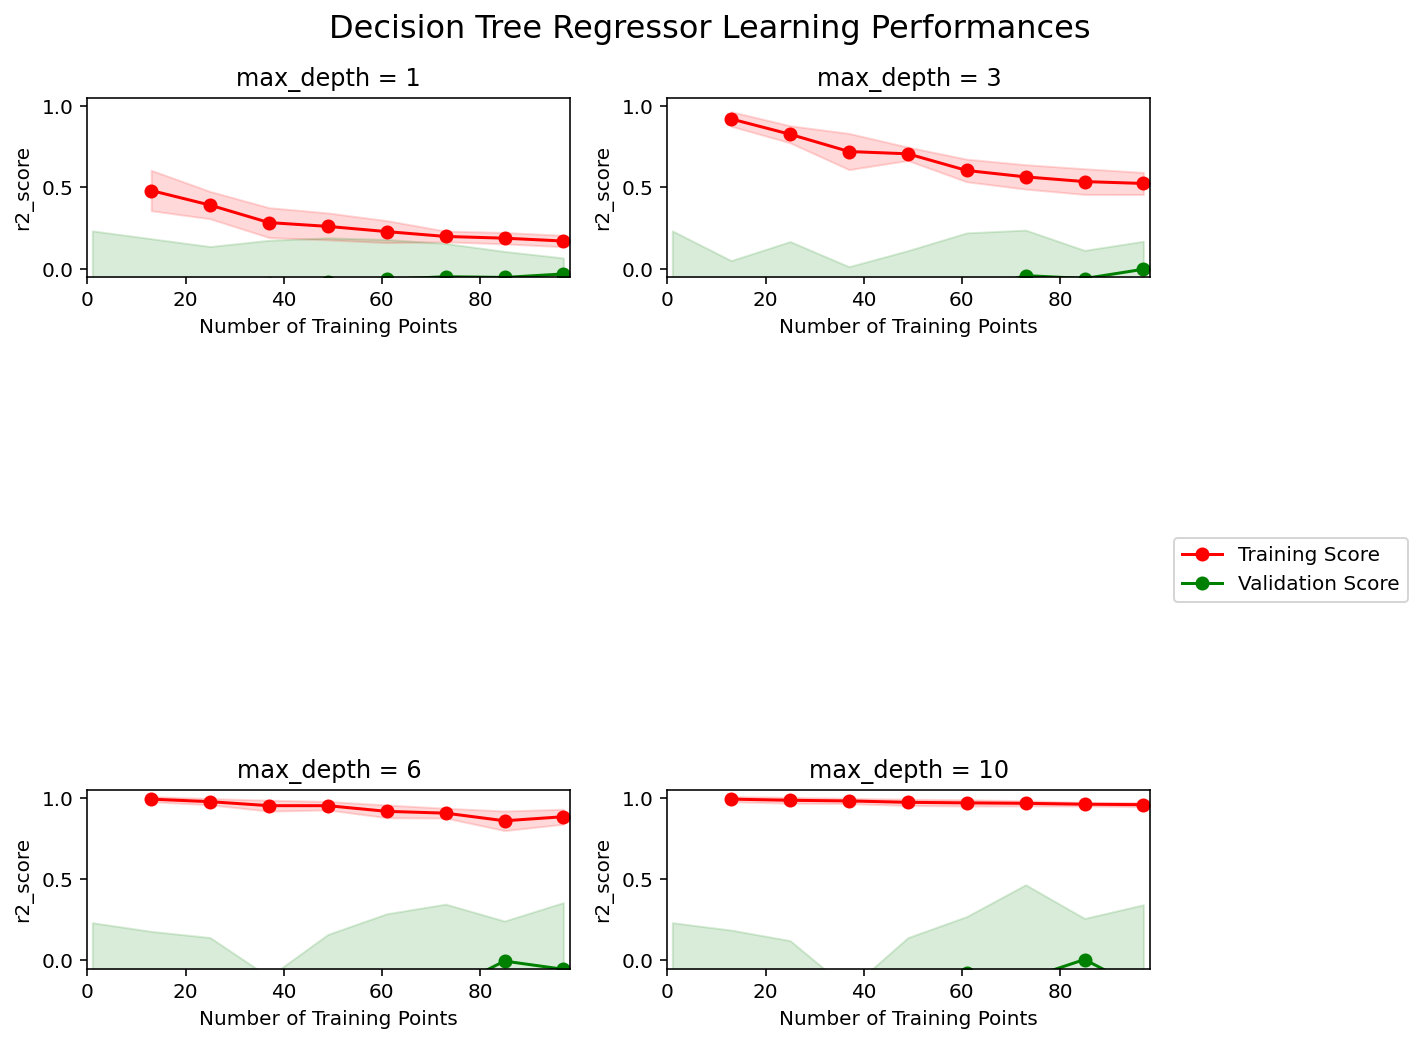

In [ ]:
# No use now.
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(Features, Oil_HHV)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

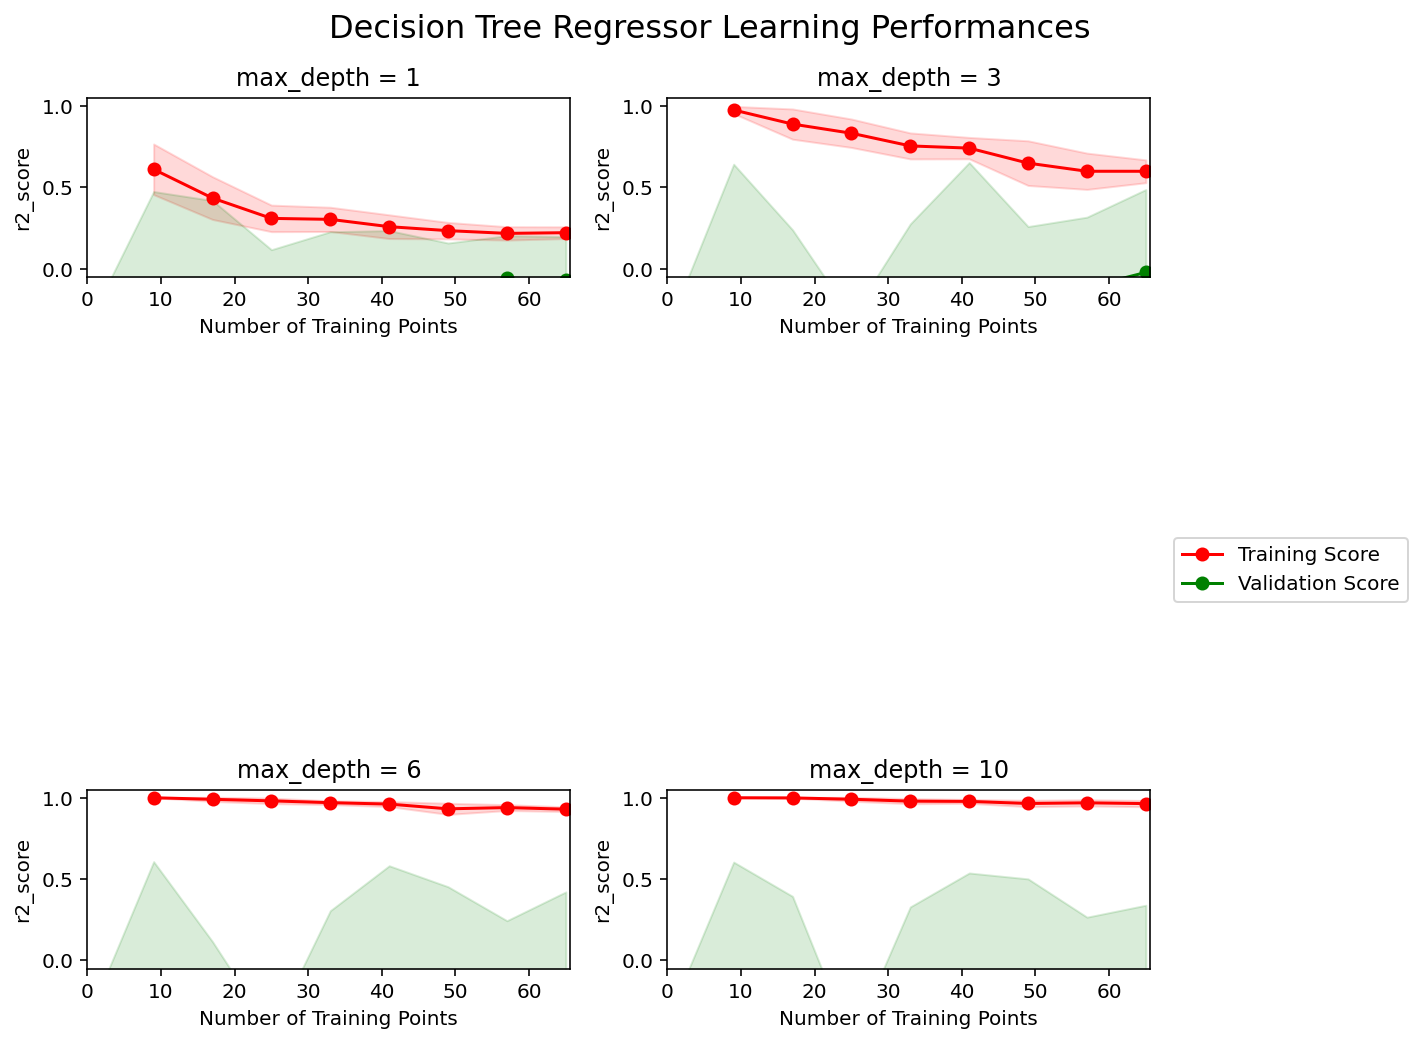

In [ ]:
# No use now.
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_train, y_train)

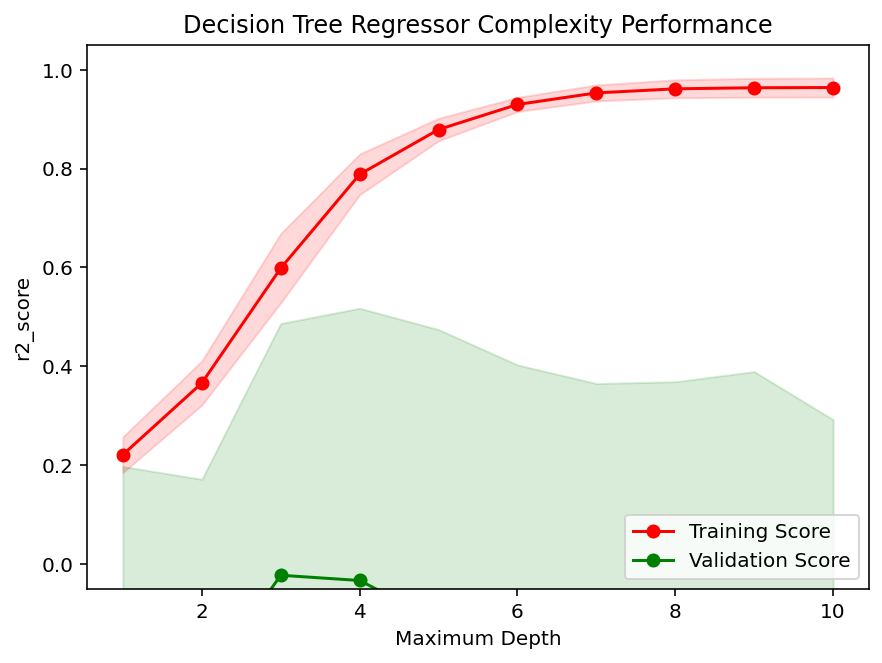

In [ ]:
# No use now.
vs.ModelComplexity(X_train, y_train)

In [8]:
#Added by Wenjing
#To define evaluation metric "mean absolute error": 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
# mean_absolute_percentage_error:https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric (y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'
  actual, pred = np.array(y_true), np.array(y_predict)

  return np.mean(np.abs(actual-pred))/np.mean(actual)

In [ ]:
# No use now.
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

# TODO: Create a decision tree regressor object
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

MRE_train = performance_metric(y_train, y_train_predict)
MRE_test = performance_metric(y_test, y_test_predict)

print("Optimal model has MAE of training set:", MAE_train)
print("Optimal model has MAE of test set:", MAE_test)
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
print("Optimal model has MRE of training set:", MRE_train)
print("Optimal model has MRE of test set:", MRE_test)

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
# feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
#                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
 #                             [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
# for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
#  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has MAE of training set: 0.28780487804878047
Optimal model has MAE of test set: 3.5008130081300814
Optimal model has RMSE of training set: 1.0237623898611965
Optimal model has RMSE of test set: 4.429209831222415
Optimal model has R2 score of training set 0.95 on test data.
Optimal model has R2 score of test set 0.37 on test data.
Optimal model has MRE of training set: 0.008586189332751218
Optimal model has MRE of test set: 0.10730661881977671


In [ ]:
# No use now.
Parity={'Predict Data':y_test_predict,'Test Data':y_test}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV.csv', index = False, header=True)

In [ ]:
# No use now.
# Evaluate model performance (use Grid Search)
# TODO: Import 'KFold', 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
  """Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]."""
  # Create cross-validation sets from the training data

  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))

  cross_validator = KFold(n_splits=3, shuffle=True)

  # TODO: Create a decision tree regressor object
  regressor = DecisionTreeRegressor()

  # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
  params = {'max_depth':range(1,11)}

  # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
  scoring_fnc = make_scorer(metrics.r2_score)

  # TODO: Create the grid search cv object --> GridSearchCV()
  # Make sure to include the right parameters in the object:
  # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
  grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

  # Fit the grid search object to the data to compute the optimal model
  grid = grid.fit(X,y)

  # Return the optimal model after fitting the data
  return grid.best_estimator_

# Prediction
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 1 for the optimal model.


In [ ]:
# No use now.
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

# TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {'max_depth':1}

# TODO: Create a decision tree regressor object
model = DecisionTreeRegressor(**params)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

MRE_train = performance_metric(y_train, y_train_predict)
MRE_test = performance_metric(y_test, y_test_predict)

print("Optimal model has MAE of training set:", MAE_train)
print("Optimal model has MAE of test set:", MAE_test)
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
print("Optimal model has MRE of training set:", MRE_train)
print("Optimal model has MRE of test set:", MRE_test)

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
# feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
#                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
#                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
# for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
#  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has MAE of training set: 3.232668144863266
Optimal model has MAE of test set: 4.160753880266077
Optimal model has RMSE of training set: 4.262106360502228
Optimal model has RMSE of test set: 5.513116284237068
Optimal model has R2 score of training set 0.21 on test data.
Optimal model has R2 score of test set 0.02 on test data.
Optimal model has MRE of training set: 0.09644138393319794
Optimal model has MRE of test set: 0.12753506959547634


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_HHV, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $37.63
Trial 2: $33.16
Trial 3: $34.81
Trial 4: $35.02
Trial 5: $38.76
Trial 6: $37.90
Trial 7: $33.73
Trial 8: $35.18
Trial 9: $29.81
Trial 10: $33.94

Range in prices: $8.95
Trial 1: $37.63
Trial 2: $33.16
Trial 3: $34.81
Trial 4: $35.02
Trial 5: $38.76
Trial 6: $37.90
Trial 7: $33.73
Trial 8: $35.19
Trial 9: $29.81
Trial 10: $33.94

Range in prices: $8.95
Trial 1: $33.47
Trial 2: $34.54
Trial 3: $32.06
Trial 4: $35.30
Trial 5: $31.34
Trial 6: $34.63
Trial 7: $35.45
Trial 8: $35.90
Trial 9: $27.90
Trial 10: $36.44

Range in prices: $8.53


In [9]:
# max_depth 参数的最佳取值(1, 21, 1)

for i in range(1, 21, 1):
  # TODO: Import 'DecisionTreeRegressor'
  from sklearn.tree import DecisionTreeRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':i}
    
    # TODO: Create a decision tree regressor object
    model = DecisionTreeRegressor(**params)
    
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.25568211578903866
Standard deviation of R2 of training set 0.031193611161021373
Mean value of R2 of test set 0.1498167765303131
Standard deviation of R2 of test set 0.12848258156006725
2
Mean value of R2 of training set 0.41319387256782647
Standard deviation of R2 of training set 0.028784670848895723
Mean value of R2 of test set 0.261567491999424
Standard deviation of R2 of test set 0.09026074182367808
3
Mean value of R2 of training set 0.5183433916918467
Standard deviation of R2 of training set 0.040256036688582096
Mean value of R2 of test set 0.10247035578903316
Standard deviation of R2 of test set 0.1258352325136275
4
Mean value of R2 of training set 0.6369977497543107
Standard deviation of R2 of training set 0.036632115470037245
Mean value of R2 of test set 0.08796783485653631
Standard deviation of R2 of test set 0.15235096624881697
5
Mean value of R2 of training set 0.7392455791254446
Standard deviation of R2 of training set 0.03895815047475114

In [10]:
# TODO: Import 'DecisionTreeRegressor'
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    #print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')

#     X_train, X_test = Features[train_index[0]:train_index[-1]], Features[test_index[0]:test_index[-1]]
#     y_train, y_test = Oil_HHV[train_index[0]:train_index[-1]], Oil_HHV[test_index[0]:test_index[-1]]
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':2}
    
    # TODO: Create a decision tree regressor object
    model = DecisionTreeRegressor(**params)
    
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    #print("Optimal model has MAE of training set:", MAE_train)
    #print("Optimal model has MAE of test set:", MAE_test)
    #print("Optimal model has RMSE of training set:", y_train_rmse)
    #print("Optimal model has RMSE of test set:", y_test_rmse)
    #print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    #print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    #print("Optimal model has MRE of training set:", MRE_train)
    #print("Optimal model has MRE of test set:", MRE_test)
    #print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of 2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of 2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 12.043859597155112
Standard deviation of MAE of training set 0.5052350416859144
Mean value of MAE of test set 13.300668955844667
Standard deviation of MAE of test set 1.0674513323012627

Mean value of RMSE of training set 15.230451266436095
Standard deviation of RMSE of training set 0.5770917608694796
Mean value of RMSE of test set 16.832440649434723
Standard deviation of RMSE of test set 1.3351549644720924

Mean value of R2 of training set 0.41319387256782647
Standard deviation of 2 of training set 0.028784670848895723
Mean value of R2 of test set 0.261567491999424
Standard deviation of 2 of test set 0.09026074182367808

Mean value of MRE of training set 0.2738745815008066
Standard deviation of MRE of training set 0.009447674174825022
Mean value of MRE of test set 0.3021739704196731
Standard deviation of MRE of test set 0.010909452864511126


Text(0.5, 1.0, 'y_pred vs. y_true')

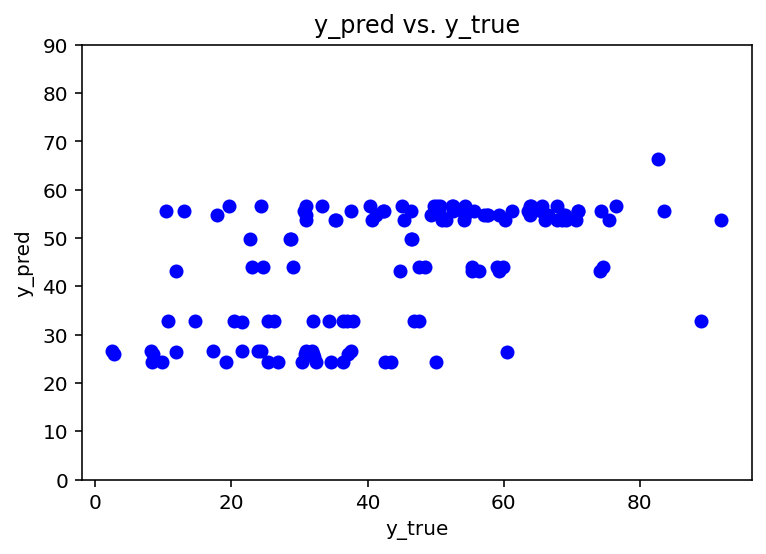

In [11]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [13]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_DT.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria
# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 25.00 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 40.10 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 29.14 wt%


In [ ]:
# No use now.
def PredictTrials(Features, Oil_Yields, fit_model, feedstock_composition_data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    yields = []

    for k in range(10):

        np.random.seed(seed = 79)
        data['random'] = np.random.random(size = len(data))

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.1, random_state = k)

        # Fit the data
        reg = fit_model(X_train, y_train)

        # Make a prediction
        pred = reg.predict([feedstock_composition_data[2]])[0]
        yields.append(pred)

        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in yields: ${:,.2f}".format(max(yields) - min(yields)))

PredictTrials(Features, Oil_Yields, fit_model, feedstock_composition_data)

Trial 1: $29.08
Trial 2: $35.28
Trial 3: $34.80
Trial 4: $33.08
Trial 5: $34.60
Trial 6: $34.55
Trial 7: $34.30
Trial 8: $34.32
Trial 9: $32.68
Trial 10: $34.15

Range in yields: $6.20
